In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
dataset_path = 'Housing.csv'

In [75]:
data = pd.read_csv(dataset_path)

In [76]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [77]:
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus'],
      dtype='object')


# 3. Performing Visualizations

## Univariate Analysis

### Histogram:

Text(0.5, 0, 'Bedrooms')

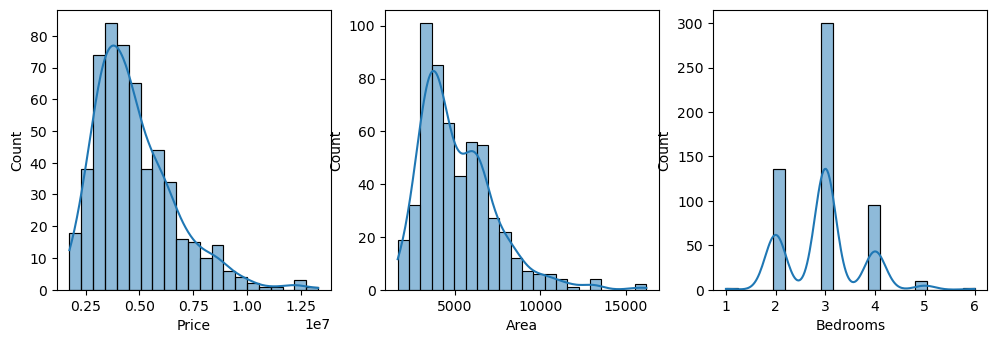

In [78]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(data['price'], kde=True)
plt.xlabel('Price')

plt.subplot(2, 3, 2)
sns.histplot(data['area'], kde=True)
plt.xlabel('Area')

plt.subplot(2, 3, 3)
sns.histplot(data['bedrooms'], kde=True)
plt.xlabel('Bedrooms')

### Bar plots

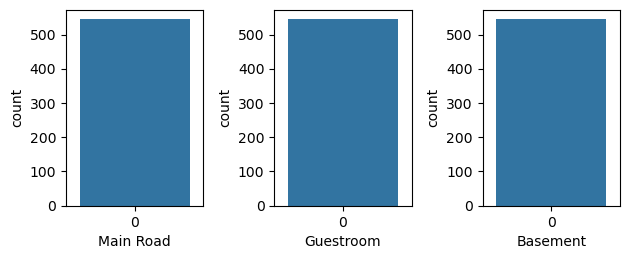

In [70]:
plt.subplot(2, 3, 4)
sns.countplot(data['mainroad'])
plt.xlabel('Main Road')

plt.subplot(2, 3, 5)
sns.countplot(data['guestroom'])
plt.xlabel('Guestroom')

plt.subplot(2, 3, 6)
sns.countplot(data['basement'])
plt.xlabel('Basement')

plt.tight_layout()
plt.show()

## Bi-Variate Analysis

### Scatter plots

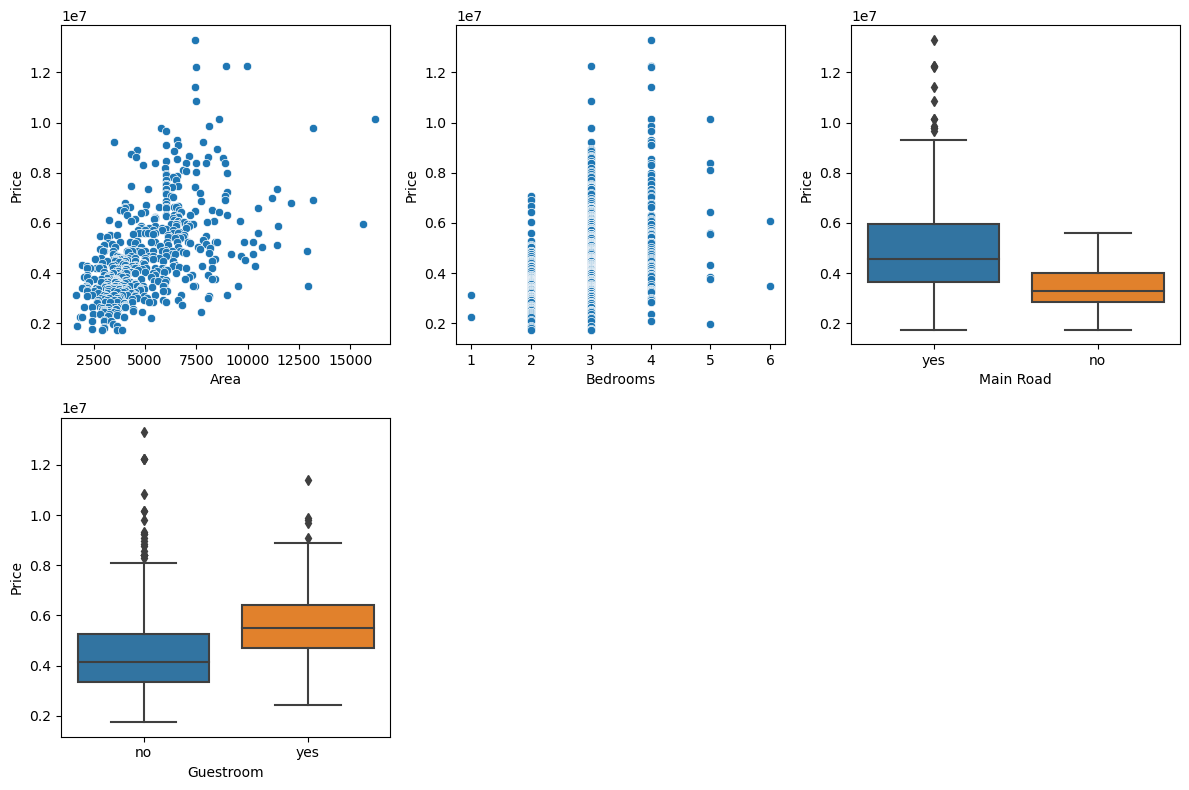

In [79]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x='area', y='price', data=data)
plt.xlabel('Area')
plt.ylabel('Price')

plt.subplot(2, 3, 2)
sns.scatterplot(x='bedrooms', y='price', data=data)
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.subplot(2, 3, 3)
sns.boxplot(x='mainroad', y='price', data=data)
plt.xlabel('Main Road')
plt.ylabel('Price')

plt.subplot(2, 3, 4)
sns.boxplot(x='guestroom', y='price', data=data)
plt.xlabel('Guestroom')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

## Multi-Variate Analysis

### Heatmap

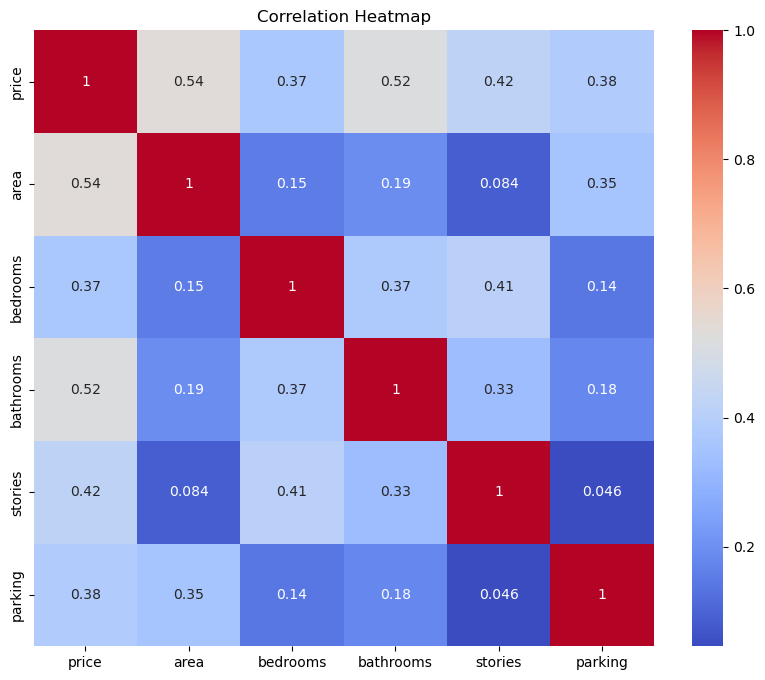

In [80]:
plt.figure(figsize=(10, 8))
corr = data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

### Pairs plots 

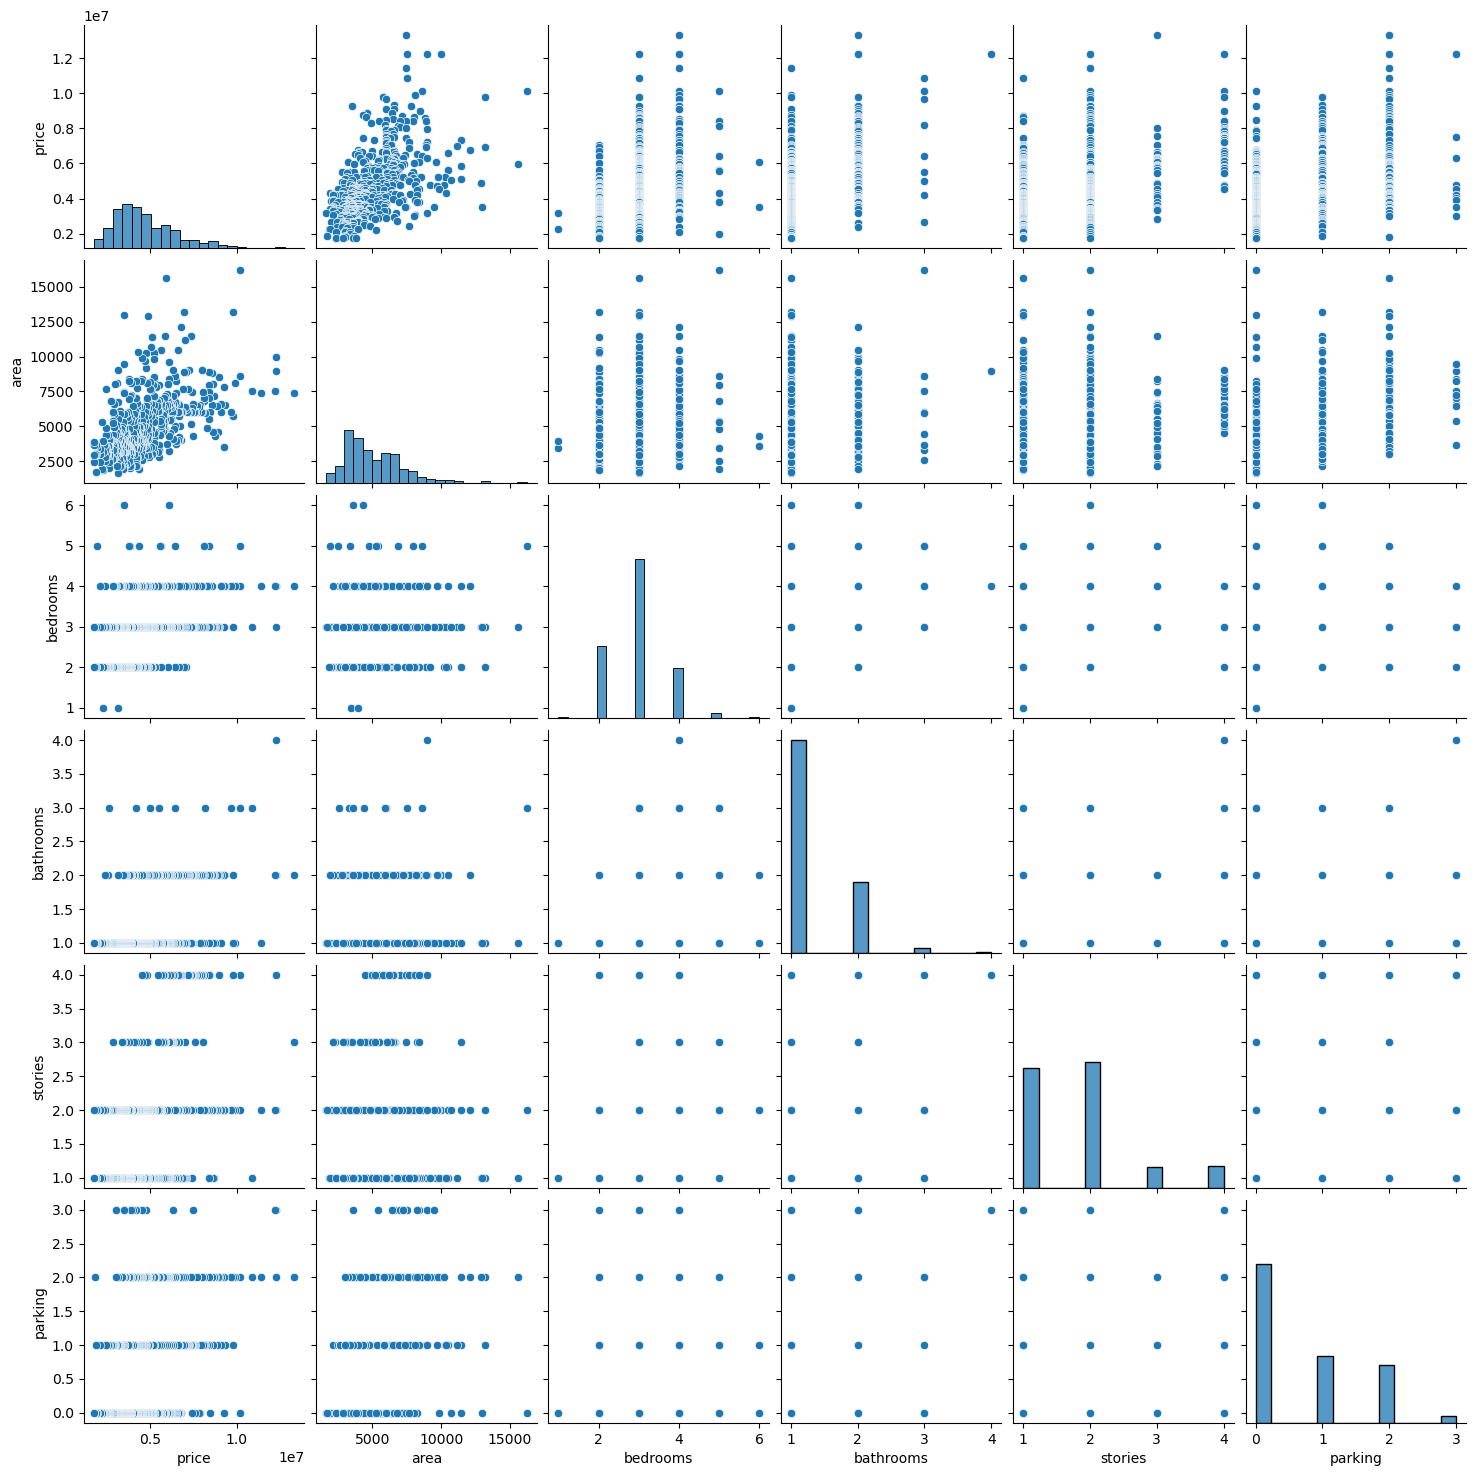

In [60]:
sns.pairplot(data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.show()

## 4. Perform descriptive statistics

In [82]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  


In [83]:
# Calculate the number of rows and columns in the dataset
num_rows, num_cols = data.shape
print("\nNumber of rows:", num_rows)
print("Number of columns:", num_cols)


Number of rows: 545
Number of columns: 12


In [85]:
# Calculate the descriptive statistics
statistics = data.describe()
print("\nDescriptive statistics:")
print(statistics)


Descriptive statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


## 5. Check for missing values

In [86]:
missing_values = data.isnull().sum()

In [87]:
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [88]:
data_cleaned = data.dropna()

In [89]:
print("\nMissing values after dealing with them:")
print(data_cleaned.isnull().sum())


Missing values after dealing with them:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


##  6. Find the outliers and replace them outliers

In [90]:
from scipy.stats import zscore

In [97]:
# Identify the columns containing numerical data to check for outliers
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms']

In [98]:
# Find outliers using z-score method
z_scores = data[numerical_columns].apply(zscore)
threshold = 3  # Set the threshold for z-score

In [99]:
# Create a copy of the original dataset to store the cleaned data
data_cleaned = data.copy()

In [100]:
# Replace outliers with the median value of the corresponding column
for column in numerical_columns:
    outliers = np.abs(z_scores[column]) > threshold
    median_value = data[column].median()
    data_cleaned.loc[outliers, column] = median_value

In [102]:
# Verify if outliers have been replaced
outliers_after_replacement = data_cleaned[numerical_columns].apply(zscore)
outliers_exist = np.any(np.abs(outliers_after_replacement) > threshold)

if outliers_exist:
    print("Outliers still exist after replacement.")
else:
    print("Outliers have been successfully replaced.")

Outliers still exist after replacement.


In [103]:
# Confirm if outliers have been replaced
print("Outliers after replacement:")
print((np.abs(data_cleaned[numeric_columns].apply(zscore)) > threshold).any(axis=1))

Outliers after replacement:
0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool


## 7. Check for Categorical columns and perform encoding

In [111]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

In [112]:
# Perform one-hot encoding for categorical columns
encoded_data = pd.get_dummies(data, columns=categorical_columns)

In [113]:
# Display the encoded data
encoded_data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,0


## Split the data 

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
# Split the data into features (X) and target variable (y)
X = encoded_data.drop('price', axis=1)
y = encoded_data['price']

In [120]:
# Specify the test size and random state
test_size = 0.2  # 20% of the data will be used for testing
random_state = 42  # Random state for reproducibility

In [121]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [122]:
# Display the shapes of the training and testing sets
print("Training set shape:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nTesting set shape:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Training set shape:
X_train shape: (436, 18)
y_train shape: (436,)

Testing set shape:
X_test shape: (109, 18)
y_test shape: (109,)


## 8. Split the data into dependent and independent variables

In [124]:
# Split the data into dependent (target) variable and independent variables
y = encoded_data['price']
X = encoded_data.drop('price', axis=1)

# Display the shapes of the independent and dependent variables
print("Independent variables shape:")
print(X.shape)
print("\nDependent variable shape:")
print(y.shape)

Independent variables shape:
(545, 18)

Dependent variable shape:
(545,)


## 9. Scale the independent variables

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [127]:
# Scale the independent variables
X_scaled = scaler.fit_transform(X)

In [130]:
print("Scaled independent variables:")
print(X_scaled)

Scaled independent variables:
[[ 1.04672629  1.40341936  1.42181174 ...  1.70084013 -0.84488844
  -0.6964292 ]
 [ 1.75700953  1.40341936  5.40580863 ...  1.70084013 -0.84488844
  -0.6964292 ]
 [ 2.21823241  0.04727831  1.42181174 ... -0.58794474  1.18358821
  -0.6964292 ]
 ...
 [-0.70592066 -1.30886273 -0.57018671 ... -0.58794474 -0.84488844
   1.43589615]
 [-1.03338891  0.04727831 -0.57018671 ...  1.70084013 -0.84488844
  -0.6964292 ]
 [-0.5998394   0.04727831 -0.57018671 ... -0.58794474 -0.84488844
   1.43589615]]


## 10. Split the data into training and testing

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [133]:
# Display the shapes of the training and testing sets
print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (436, 18)
y_train: (436,)

Testing set shapes:
X_test: (109, 18)
y_test: (109,)


## 11. Build the model 

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
# Create an instance of the Linear Regression model
model = LinearRegression()

In [141]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [143]:
# Predict the target variable for the test data
y_pred = model.predict(X_test)

In [144]:
# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 5.51629531e+05  6.41181219e+04  5.40416105e+05  3.53309064e+05
  1.93413034e+05 -1.06550040e+19 -1.06550040e+19  3.26250133e+19
  3.26250133e+19  1.27429839e+17  1.27429839e+17 -4.73117027e+19
 -4.73117027e+19 -1.00146563e+18 -1.00146563e+18 -3.20073633e+18
 -3.61147704e+18 -3.43559057e+18]
Intercept: 4738911.385321101


## 12.Train the Model


In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
# Create an instance of the Linear Regression model
model = LinearRegression()

In [153]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

## 13. Test the Model

In [154]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([5263199.3853211, 6760287.3853211, 3222879.3853211, 4768607.3853211,
       3416415.3853211, 3703135.3853211, 5831519.3853211, 5984095.3853211,
       2715487.3853211, 2600799.3853211, 9182047.3853211, 2907487.3853211,
       3161951.3853211, 3444575.3853211, 3870559.3853211, 5246815.3853211,
       3114335.3853211, 4959071.3853211, 4575071.3853211, 3722591.3853211,
       5299039.3853211, 5541727.3853211, 2833759.3853211, 4312927.3853211,
       5517151.3853211, 7209823.3853211, 3395423.3853211, 5394271.3853211,
       7889759.3853211, 3493215.3853211, 6052703.3853211, 3420511.3853211,
       6885215.3853211, 4372831.3853211, 3702111.3853211, 5967711.3853211,
       5033823.3853211, 4561759.3853211, 3190623.3853211, 4687711.3853211,
       4761951.3853211, 3635039.3853211, 6739807.3853211, 4110687.3853211,
       3915103.3853211, 4433759.3853211, 6913887.3853211, 4184415.3853211,
       3954015.3853211, 3578719.3853211, 7448415.3853211, 2895199.3853211,
       4523359.3853211, 4

## 14. Measure the performance using Metrics

### Mean Squared Error (MSE)

In [150]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

1822301652275.5405


### Root Mean Squared Error (RMSE)

In [156]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1349926.5358809496


### Mean Absolute Error (MAE)

In [158]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

983488.8553993773


### R-squared (R2) Score

In [159]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.6394744630192943
